### Explainability Encyclopedia

Reference for general techniques used to evaluate parameters/features in ML models

#### Data Setup

Using the credit card fraudulent dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

print(df.dtypes, df.columns)
df.head()


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No missing values to clean

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Model has very unbalanced outcomes. 1 is fraudulent credit card activity.

Class
0    284315
1       492
dtype: int64


<Axes: xlabel='Class', ylabel='Count'>

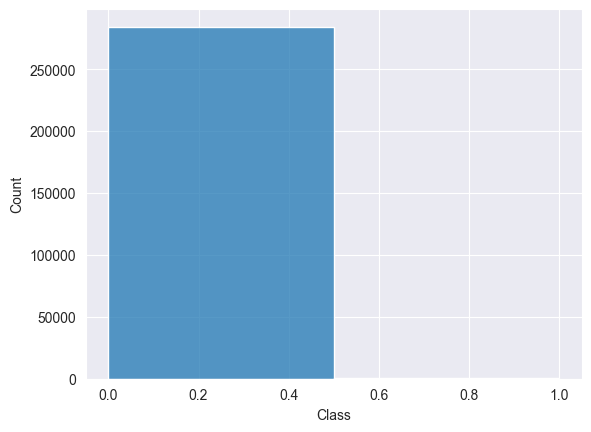

In [ ]:
print(df.groupby('Class').size())
sns.histplot(data = df, x = 'Class', stat='count', bins = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

y = df['Class']
X = df[df.columns[:-1]].copy()

s_scaler = StandardScaler()
r_scaler = RobustScaler()

X['scaled_time'] = s_scaler.fit_transform(X['Time'].values.reshape(-1, 1))
X['scaled_amount'] = s_scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X.drop(['Time', 'Amount'], axis = 1, inplace = True)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.996541,-0.073403


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(y_train.mean(), y_test.mean())

0.0017305029995385325 0.0017204452090867595


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f'Train Accuracy, {lr.score(X_train, y_train):.2f}')
print(f'Test Accuracy, {lr.score(X_test, y_test):.2f}')

Train Accuracy, 0.98
Test Accuracy, 0.98


<Axes: >

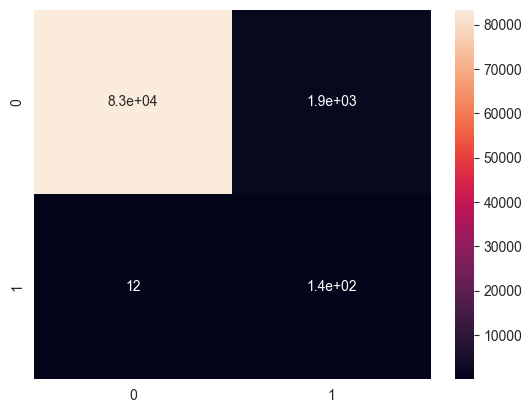

In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Confusion matrix is showing that the model is still struggling from class imbalance, give large False Negative Score.

Will try to use oversampling instead with the logistic regression model

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)
X_over, y_over = oversample.fit_resample(X, y)

print('New y population positives and split:', y_over.sum(), y_over.mean())

X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 0)

print('New y train population positives and split:', y_over_train.sum(), y_over_train.mean())
print('New y test population positives and split:', y_over_test.sum(), y_over_test.mean())

New y population positives and split: 284315 0.5
New y train population positives and split: 198898 0.4996922427589118
New y test population positives and split: 85417 0.5007181002292058


In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_over_train, y_over_train)
pred2 = lr2.predict(X_over_test)

print(f'Train Accuracy: {lr2.score(X_over_train, y_over_train):.2f}')
print(f'Test Accuracy: {lr2.score(X_over_test, y_over_test):.2f}')

Train Accuracy: 0.95
Test Accuracy: 0.95


<Axes: >

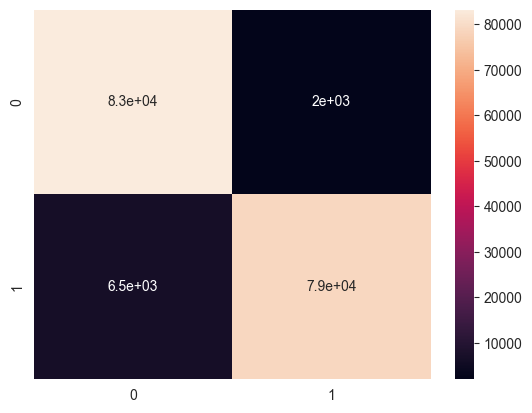

In [ ]:
cm2 = metrics.confusion_matrix(y_over_test, pred2)
sns.heatmap(cm2, annot=True)

Confusion matrix is much more balanced, false positive/negative rate much more equal, and < 10% of both True positive and True Negative

In [ ]:
for i, j in  zip(list(lr2.coef_[0]), X_over_train.columns.tolist()):
    print(f"Parameter {j} Coefficient", i)

Parameter V1 Coefficient 0.6234387563021964
Parameter V2 Coefficient 0.5195736504489894
Parameter V3 Coefficient 0.2441739684681603
Parameter V4 Coefficient 0.7636864968942365
Parameter V5 Coefficient 0.6996534985683931
Parameter V6 Coefficient -0.5124066543672697
Parameter V7 Coefficient -0.4851013085796504
Parameter V8 Coefficient -0.4338750358600987
Parameter V9 Coefficient -0.31679760848512034
Parameter V10 Coefficient -0.7131991278057734
Parameter V11 Coefficient 0.46656508033608357
Parameter V12 Coefficient -1.0092154488051748
Parameter V13 Coefficient -0.35947808276892695
Parameter V14 Coefficient -1.3626463901291341
Parameter V15 Coefficient -0.1542729012200577
Parameter V16 Coefficient -0.6910336192266808
Parameter V17 Coefficient -0.8328828299001413
Parameter V18 Coefficient -0.23209342709116623
Parameter V19 Coefficient 0.3030640604433335
Parameter V20 Coefficient -0.7538454869772861
Parameter V21 Coefficient 0.04809143516731935
Parameter V22 Coefficient 0.7384894999853832
P

### Techniques

##### Setup

In [ ]:
model = lr2

##### Permutation Importance

Shows each columns data to a random permutation, and analyses the corresponding drop in model performance.

Idea: columns when reshuffled which cause the largest drop in performance have greater predictive power **for the particular model**
* doesn't necessarily mean that the feature is predictive of the response in general
* can give misleading (underestimates) importances on highly correlated features


Formula:
1. Estimate original model error
2. For each feature, permute the column, estimate the error based on the permutated X matrix
3. Calculate permutation feature importance by comparing permuted error and original error. Can use quotient, difference etc. eli5 uses difference

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=0).fit(X_over_train, y_over_train)
eli5.show_weights(perm, feature_names=X_over_train.columns.tolist(), top = len(X_over_train.columns.tolist()))

Weight,Feature
0.2128 ± 0.0009,V14
0.1618 ± 0.0008,V12
0.1354 ± 0.0006,V17
0.1177 ± 0.0007,V4
0.1107 ± 0.0005,V10
0.0868 ± 0.0013,V16
0.0721 ± 0.0007,V7
0.0525 ± 0.0005,V2
0.0377 ± 0.0005,V11
0.0351 ± 0.0005,scaled_amount


conclusion: Features V14, V12 and V17 had the highest predictive power

##### Partial Plots

Shows how a feature affects predictions. Can show value trends within each feature, giving new insights
* Multi dimensional plots can be made to visualise correlations

Partial dependence plots are less useful when the feature is predictive through an interaction. For example y = X1 * X2 may give a sideways partial plot for X1, even though X1 is important for prediction

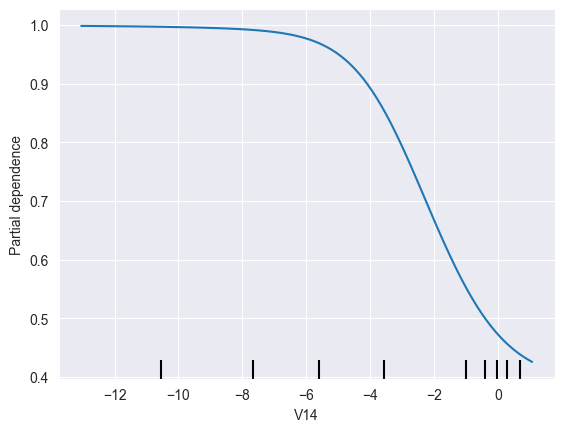

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

plt1 = PartialDependenceDisplay.from_estimator(model, X_over_train, ['V14'])

y axis is interpreted as the change in prediction from what it would be predicted at the baseline or leftmost value. For this graph, a higher V14 value corresponds to a much lower chance of a fraudulent transaction

For a 2D partial dependence plot, I will find two highly correlated features and see if the result dependence has any structure

<Axes: >

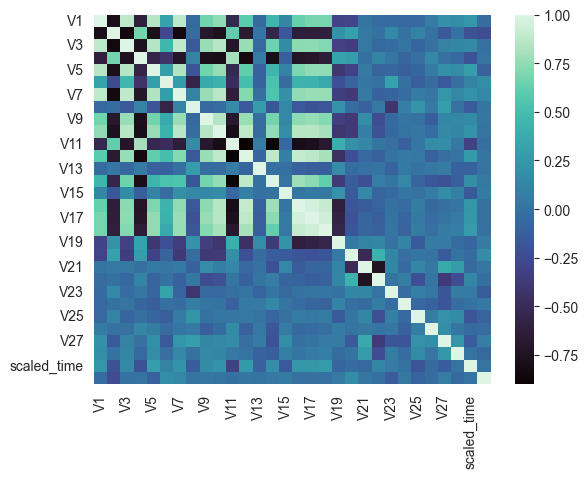

In [ ]:
sns.heatmap(X_over_train.corr(), cmap = 'mako')

Can see V17 and V18 are strongly positively correlated

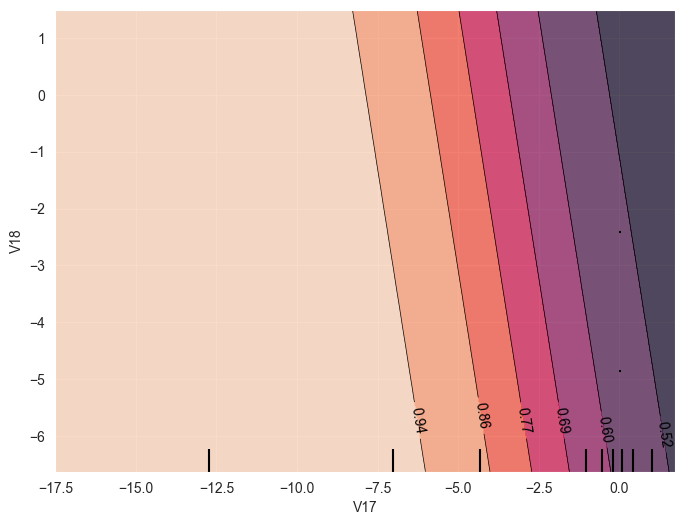

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt2 = PartialDependenceDisplay.from_estimator(model, X_over_test, [('V17', 'V18')], ax = ax)
plt.show()

from the resulting plot we see that a lower both V17 and V18 is more likely to detect a fraudulent transaction

##### SHAP Values

Shap value is the average expected marginal contribution of a feature after considering all possible combinations of features.
For a feature a:
* Get all subset of features S that do not contain a
* Compute the effect on predictions of adding a to every subset

In [ ]:
import shap

# Due to large data size, need to use kmeans and batch approach to downsize

f = lambda X: model.predict_proba(X)[:, 1]

background = shap.kmeans(X_over_train, k = 50)
explainer = shap.KernelExplainer(f, background)

X_batch = X_over_test.sample(300, random_state=0)
values = explainer.shap_values(X_batch, n_samples='auto')

C:\Users\TJ577DF\PycharmProjects\BatteryEDA\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
  0%|          | 0/300 [00:00<?, ?it/s]C:\Users\TJ577DF\PycharmProjects\BatteryEDA\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\TJ577DF\PycharmProjects\BatteryEDA\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\TJ577DF\PycharmProjects\BatteryEDA\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\TJ577DF\PycharmProjects\BatteryEDA\.venv\Lib\site-packages\sklea

Quick visualisation of the spread of shap values

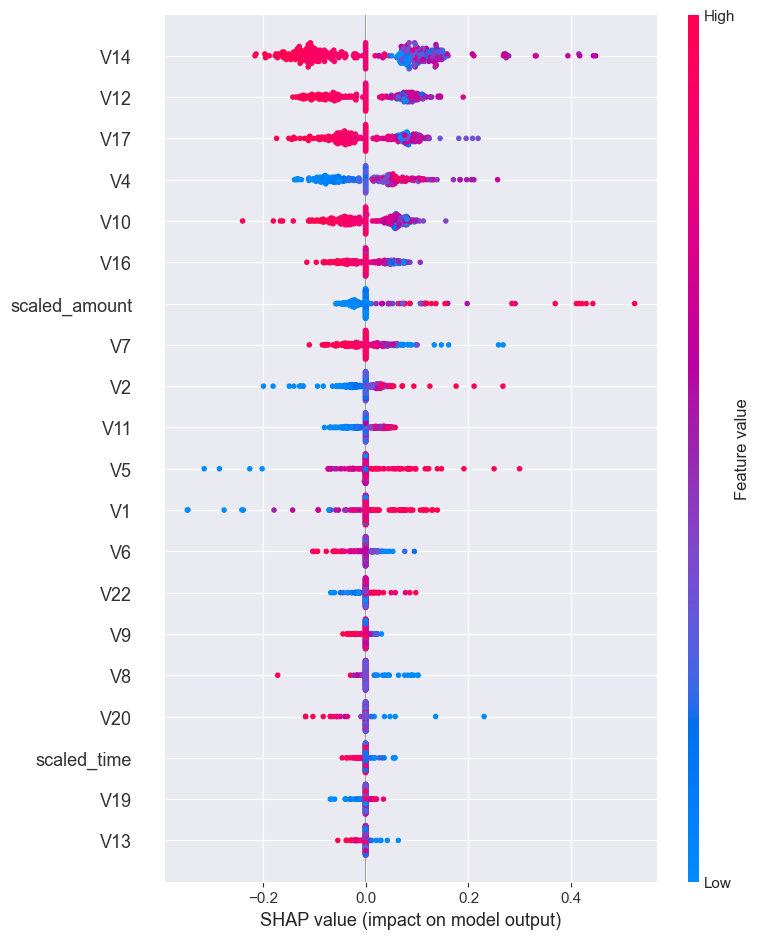

In [ ]:
shap.summary_plot(values, X_batch)

From the summary plot, we see negative values of V14 are generally extremely important, meanwhile higher values become less important

Force plot shows how each feature pushes a prediction away from the models base value

In [ ]:
shap.force_plot(explainer.expected_value, values, X_batch)

V12 force plot above shows that a more negative V12 value generally meant a higher predicted probability of fraud

For pairwise dependencies, an alternate visualisation is shown below

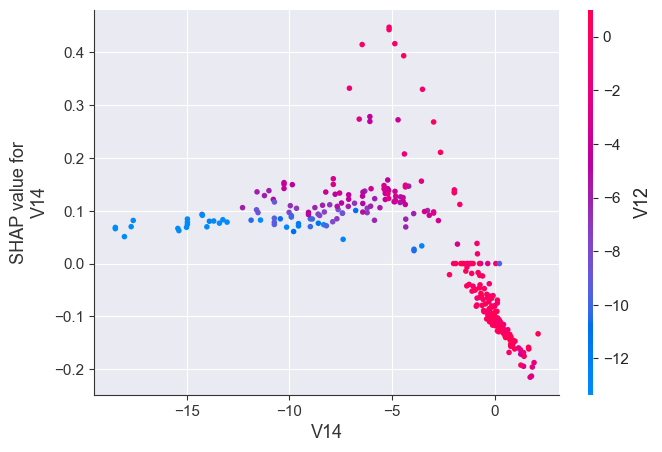

In [ ]:
shap.dependence_plot('V14', values, X_batch, interaction_index='V12')